### Time Series Momentum

In [2]:
import pandas as pd 
import yfinance as yf 
import numpy as np

In [3]:
df = yf.download('AAPl', start='2020-08-01')

[*********************100%***********************]  1 of 1 completed


In [4]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-03,108.199997,111.637497,107.892502,108.937500,107.751755,308151200
2020-08-04,109.132500,110.790001,108.387497,109.665001,108.471344,173071600
2020-08-05,109.377502,110.392502,108.897499,110.062500,108.864517,121776800
2020-08-06,110.404999,114.412498,109.797501,113.902496,112.662712,202428800
2020-08-07,113.205002,113.675003,110.292503,111.112503,110.101250,198045600
...,...,...,...,...,...,...
2022-02-14,167.369995,169.580002,166.559998,168.880005,168.880005,86185500
2022-02-15,170.970001,172.949997,170.250000,172.789993,172.789993,64286300
2022-02-16,171.850006,173.339996,170.050003,172.550003,172.550003,61177400


In [5]:
#note! the window argument in the function denotes the days that are rolled back in reference to the data
def strategy(df, window=1):
    df = df.copy()
    df['ret'] = np.log(df.Close.pct_change() + 1)
    df['prior_n'] = df.ret.rolling(window).sum()
    df.dropna(inplace=True)
    df['position'] = [1 if i>0 else -1 for i in df.prior_n]
    df['strat'] = df.position.shift(1) * df.ret 
    return np.exp(df[['ret','strat']].cumsum()).plot(figsize=(12,6))


<AxesSubplot:xlabel='Date'>

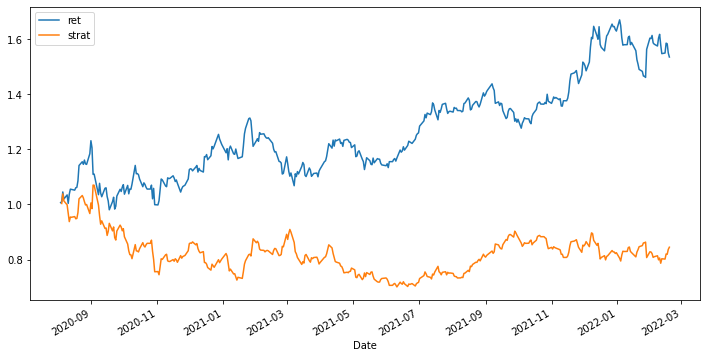

In [6]:
strategy(df)